# Pruebas ETo
***

_Autor_: __Jesús Casado__<br>
_Fecha_: __20/08/2020__<br>

__Introducción__<br>


__Errores a corregir__<br>


__Índice__<br>


In [11]:
import os
rutaBase = os.getcwd().replace('\\', '/') + '/'

In [12]:
rutaOut = rutaBase + '../output/'
if os.path.exists(rutaOut) is False:
    os.makedirs(rutaOut)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')

In [61]:
from datetime import datetime, timedelta

In [16]:
# cargar funciones propias para trabajar con curvas de gasto
%run funciones_ETo.ipynb

In [79]:
# función para leer series del SAIH
os.chdir(rutaBase + '../../Series/CHC/notebooks/')
%run funciones_SAIH.ipynb
os.chdir(rutaBase)

In [80]:
# función para leer series del SAIH
os.chdir(rutaBase + '../../Modelos/notebooks/')
%run funciones_modelos.ipynb
os.chdir(rutaBase)

### Ejemplo de Joan

In [17]:
rutaDatos = rutaBase + '../data/'

In [18]:
T = pd.read_csv(rutaDatos + 'T30_ene.csv', parse_dates=True, dayfirst=True, index_col=0)
T.head(2)

Tmax  Tmin
fecha                          
2020-01-01 00:00:00   5.8   5.6
2020-01-01 00:30:00   5.6   5.3

In [19]:
lat = 43.20
lon = 5
z = 300
α = 0.23

In [20]:
T.max().max(), T.min().min()

(9.3, 2.1)

In [21]:
# calcular la serie de ETo
ETo = pd.Series(index=T.index, dtype='float64')
Δt = (T.index[1] - T.index[0]).seconds / 3600
for i, fecha in enumerate(T.index):
    print(fecha, end='\r')
    Tmax, Tmin = T.loc[fecha]
    Td_max  = T.max().max()
    Td_min  = T.min().min()
    ETo[fecha] = estimar_ETo(Tmax, Tmin, lat, lon, z, fecha, Δt, Lz=0, Td_max=Td_max, Td_min=Td_min,
                             α=α, verbose=False)

### Ejemplo con una estación

In [197]:
# estación del ejemplo
stn = 'A353'

#### Cartografía

In [198]:
# cargar tabla de atributos de las estaciones del SAIH
stns = dbf2df('P:/GRUPOS/SAIH CHC 20-22/100_CARTOGRAFIA/CHC/SAI/Estaciones_SAIH-CHC_z.dbf',
              encoding='latin-1', index_col='COD_SAIH')

In [200]:
# extraer atributos de la estación
lat = stns.loc[stn, 'Lat']
lon = abs(stns.loc[stn, 'Lon'])
z = stns.loc[stn, 'Z']

#### Serie de temperatura

In [201]:
rutaProy = 'P:/GRUPOS/SAIH CHC 20-22/MODELOS HIDROLÓGICOS/'
rutaDatos = rutaProy + 'Datos/SAIH-CHC/Tratado/2. Curvas de gasto/5min/'

T = leer_serieSAIH('{0}{1}.csv'.format(rutaDatos, stn), var=['Temperatura_°C'])
T = T['Temperatura_°C']
T = rellenar_huecos(T, n=12).round(1)
# T.head()

#### Calcular ETo

In [203]:
%run funciones_ETo.ipynb

In [205]:
# parámetros para el cálculo de la ETo
α = 0.23 # albedo
Δt = 0.5 # paso temporal (h)

In [1]:
ETo = estimar_ETo_serie(T, lat, lon, z, Δt, Lz=0, α=α, verbose=False)

NameError: name 'estimar_ETo_serie' is not defined

In [210]:
ETo_M = ETo.resample('M').sum()
ETo_Y = ETo.resample('Y').sum()

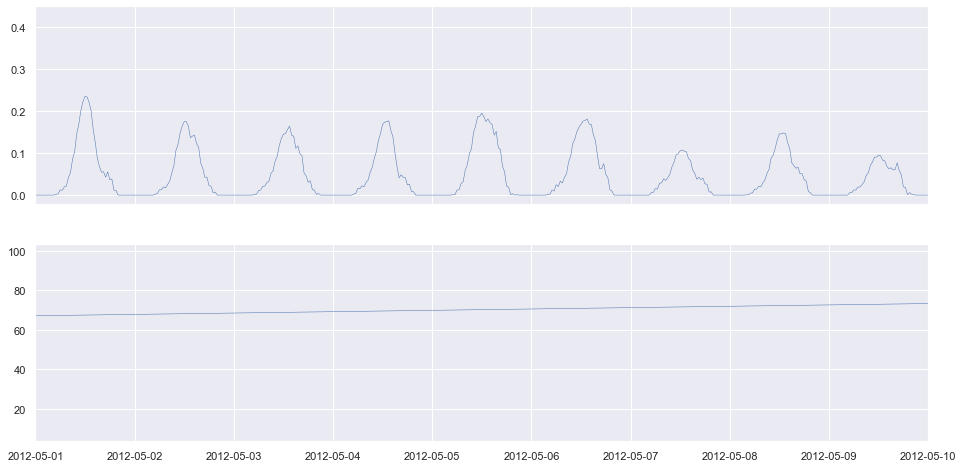

In [214]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 8), sharex=True)
ax[0].plot(ETo, lw=.5)
ax[1].plot(ETo_M, lw=.5)
# plt.plot(ETo_Y, lw=.5)
ax[1].set_xlim(datetime(2012, 5, 1), datetime(2012, 5, 10));

In [212]:
ETo_Y

2012-12-31    545.111369
2013-12-31    564.878917
2014-12-31    564.289182
2015-12-31    196.785486
Freq: A-DEC, dtype: float64